# Homework 2

46-921, Fall 2020

Due Thursday, September 17 at 9:30 AM

Chun-Yuan (Scott) Chiu, chunyuac@andrew.cmu.edu

You should submit the Jupyter notebook with your answers in the
appropriate spaces. Rename the file as `YOURANDREWID_HW2.ipynb`
and submit it via Canvas. Also submit a `.pdf` version of your homework.

When you are asked to create a plot, you have the flexibility
to use your judgement to choose the plot you feel is most appropriate.
I expect that you will take steps to make the plot clean and readable.

**Question One:**
Go to the following website:

https://www.quandl.com/data/AAII/AAII_SENTIMENT-AAII-Investor-Sentiment-Data

and download the data set. (Note that there are multiple ways of doing this,
including using the "Download" button in the upper right of the screen.)
Read these data into Python and create an appropriate data frame.
Be sure that each column is in an appropriate form (date, factor,
character, etc.)
When reading in the file, do not make any changes to the data
file itself. Resolve any issues using appropriate Python commands.

**Answer:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fulldata = pd.read_csv('AAII-AAII_SENTIMENT.csv')
fulldata['Date'] = pd.to_datetime(fulldata['Date'], format='%Y-%m-%d').dt.date
fulldata.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2020-09-10,0.237113,0.278351,0.484536,1.000000,0.270734,-0.247423,0.379315,0.48007,0.27856,3588.11,3329.27,3398.96
1,2020-09-03,0.308017,0.274262,0.417722,1.000001,0.279641,-0.109705,0.379315,0.48007,0.27856,3588.11,3444.15,3580.84
2,2020-08-27,0.320755,0.283019,0.396226,1.000000,0.275083,-0.075471,0.379315,0.48007,0.27856,3481.07,3354.69,3478.73
3,2020-08-20,0.303887,0.272085,0.424028,1.000000,0.262678,-0.120141,0.379315,0.48007,0.27856,3399.54,3355.46,3374.85
4,2020-08-13,0.300366,0.278388,0.421245,0.999999,0.254865,-0.120879,0.379315,0.48007,0.27856,3387.89,3317.37,3380.35


**Question Two:**
Are there any missing values in the data set? If so, describe any features/patterns
in the missingness.

**Answer:**

First we examine where all the missing data is: 

In [2]:
np.where(fulldata.isna())

(array([1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1286, 1286, 1286,
        1286, 1286, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1729,
        1729, 1729, 1729, 1729, 1730, 1730, 1730, 1730, 1730, 1730, 1730,
        1730, 1730]),
 array([ 5,  5,  5,  5,  5,  5,  5,  1,  2,  3,  4,  5,  6,  5,  5,  5,  5,
         5,  5,  5,  1,  2,  3,  4,  5,  6,  1,  2,  3,  4,  5,  6, 10, 11,
        12]))

We then list the data which has at least one missing value, and present it in a heatmap to see if there are interesting patterns. The syntax here is different from what we did in the class, which I thought is a little bit more readable. 

In [3]:
nadata = fulldata[fulldata.isna().apply(lambda row: row.any(), axis='columns')]
nadata

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
1279,1996-02-29,0.45,0.28,0.27,1.0,NaN,0.18,0.386014,0.489178,0.28285,659.08,635.00,644.37
1280,1996-02-22,0.49,0.22,0.29,1.0,NaN,0.20,0.386014,0.489178,0.28285,663.00,638.79,659.08
1281,1996-02-15,0.54,0.21,0.25,1.0,NaN,0.29,0.386014,0.489178,0.28285,664.23,646.99,647.98
1282,1996-02-08,0.53,0.31,0.16,1.0,NaN,0.37,0.386014,0.489178,0.28285,656.37,641.43,656.37
1283,1996-02-01,0.54,0.31,0.15,1.0,NaN,0.39,0.386014,0.489178,0.28285,639.26,621.42,635.84
1284,1996-01-25,0.36,0.40,0.24,1.0,NaN,0.12,0.386014,0.489178,0.28285,621.62,610.65,621.62
1285,1996-01-18,0.42,0.29,0.29,1.0,NaN,0.13,0.386014,0.489178,0.28285,612.92,598.47,611.83
1286,1996-01-11,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.28285,619.15,597.29,601.81
1722,1987-09-04,0.42,0.17,0.41,1.0,NaN,0.01,0.386014,0.489178,0.28285,329.79,316.70,316.70
1723,1987-08-28,0.52,0.18,0.30,1.0,NaN,0.22,0.386014,0.489178,0.28285,331.38,323.04,323.04


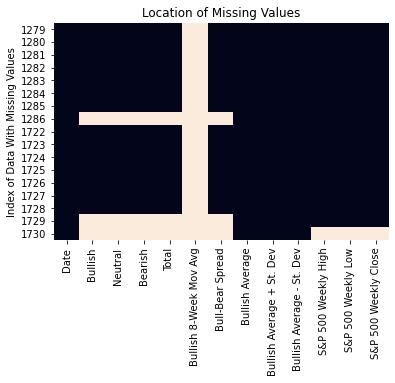

In [4]:
ax = sns.heatmap(nadata.isna(), cbar=False)
ax.set_title('Location of Missing Values')
ax.set_ylabel('Index of Data With Missing Values')
plt.show()

Here are data from the oldest few dates in the data set: 

In [5]:
fulldata.tail(15)

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
1716,1987-10-16,0.37,0.30,0.33,1.0,0.48000,0.04,0.384907,0.488293,0.281522,314.52,282.70,282.70
1717,1987-10-09,0.46,0.39,0.15,1.0,0.51625,0.31,0.384907,0.488293,0.281522,328.08,311.07,311.07
1718,1987-10-02,0.44,0.26,0.30,1.0,0.51500,0.14,0.384907,0.488293,0.281522,328.07,321.69,328.07
1719,1987-09-25,0.53,0.17,0.30,1.0,0.53000,0.23,0.384907,0.488293,0.281522,321.19,310.54,320.16
1720,1987-09-18,0.60,0.29,0.11,1.0,0.49625,0.49,0.384907,0.488293,0.281522,323.08,314.86,314.86
1721,1987-09-11,0.50,0.23,0.27,1.0,0.46625,0.23,0.384907,0.488293,0.281522,321.98,313.56,321.98
1722,1987-09-04,0.42,0.17,0.41,1.0,NaN,0.01,0.386014,0.489178,0.282850,329.79,316.70,316.70
1723,1987-08-28,0.52,0.18,0.30,1.0,NaN,0.22,0.386014,0.489178,0.282850,331.38,323.04,323.04
1724,1987-08-21,0.66,0.28,0.06,1.0,NaN,0.60,0.386014,0.489178,0.282850,335.90,329.25,335.90
1725,1987-08-14,0.45,0.35,0.20,1.0,NaN,0.25,0.386014,0.489178,0.282850,334.65,323.00,333.99


Observations made from the above tables: 
1. Most of the missing values appear in the Bullish 8-Week Mov Avg column. Since it takes average of the Bullish column over an 8-week window, it is supposed to have a value only after 7 dates with available Bullish data, which brings us to 1987-9-11 and after
1. The earliest two dates do not even have Bullish Neutral and Bearish. They can be removed from the data set
1. For some reason Bullish, Neutral and Bearish data are also missing on 1996-1-11 which results in missing values in the Bullish 8-Week Mov Avg column on 8 dates (1996-1-11 and the following 7 weeks)

**Question Three:**
Create a figure that shows how the proportion of investors who are
bullish/neutral/bearish changes over the __years__ of the data set.

**Answer:**

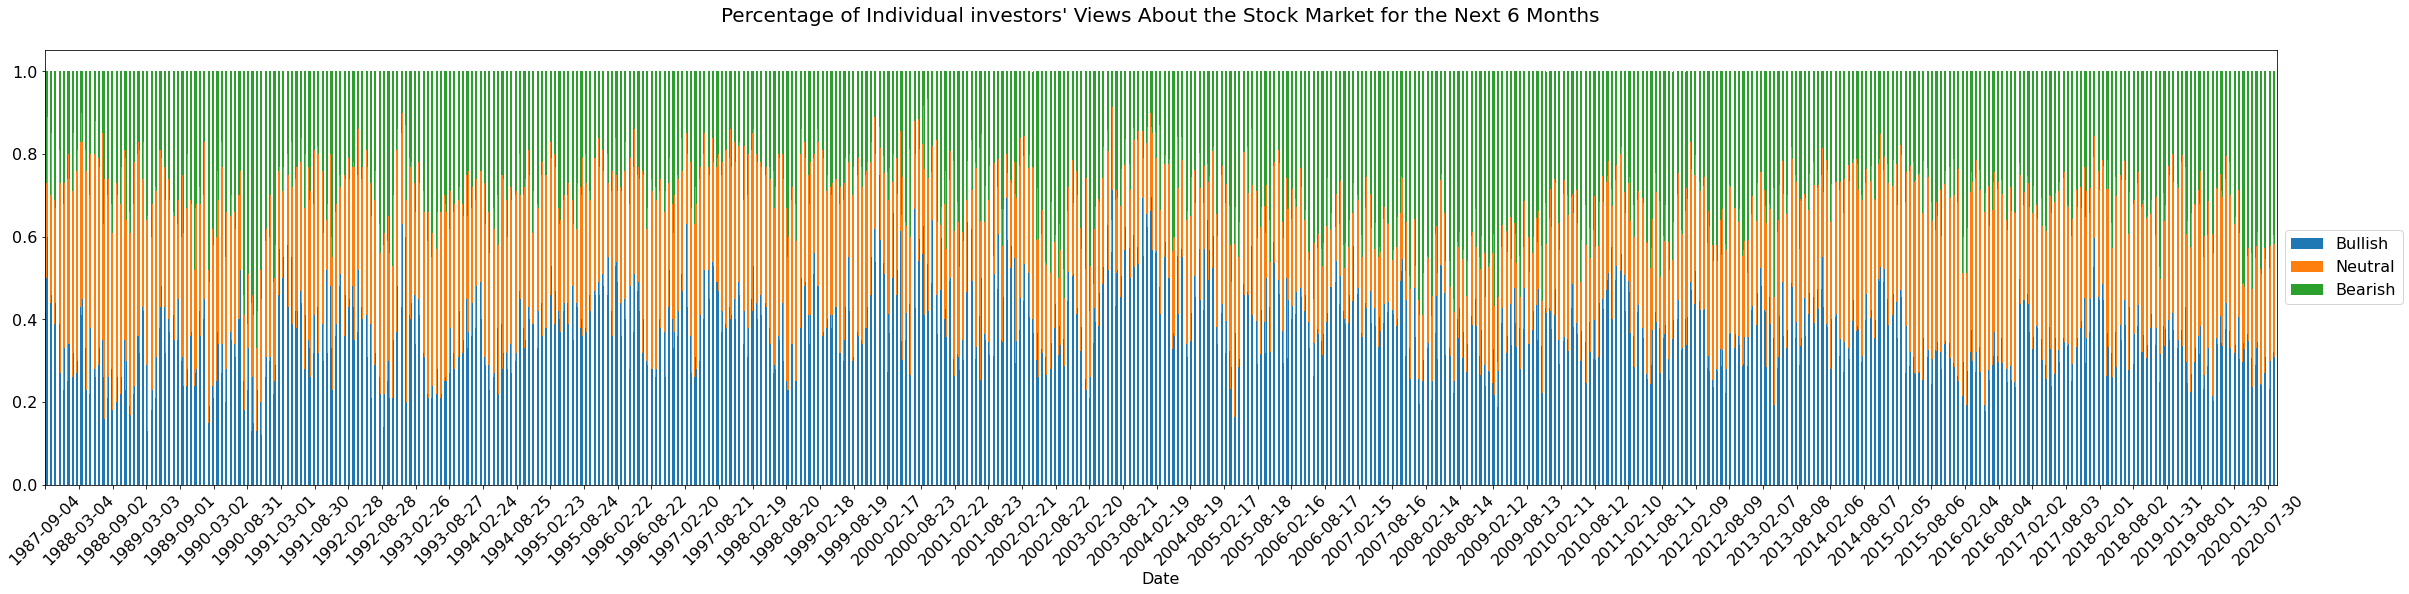

In [6]:
tick_spacing = 26

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)

ax = fulldata[:-8][::-1].set_index('Date')[['Bullish', 'Neutral', 'Bearish']].plot(kind='bar', stacked=True, figsize=[40, 8], rot=45)
ax.set_title("Percentage of Individual investors' Views About the Stock Market for the Next 6 Months\n", fontsize=20)
ax.set_xticks(ax.get_xticks()[::tick_spacing])
ax.set_xlabel('Date', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

**Question Four:** A colleague wonders if there could be a seasonal effect, i.e., that
there are natural variations in investor sentiment over the course of
a year that tend to repeat from year to year. Create a plot that explores
whether or not there is evidence for this. Be sure to include a description
of your conclusion. **Do not perform any "formal"
analyses.**

**Answer:**

For each month in the data set, we take average of the percentage of people who have a bullish view. Then we get a line plot of the monthly average for each year. We find no obvious seasonal effect. 

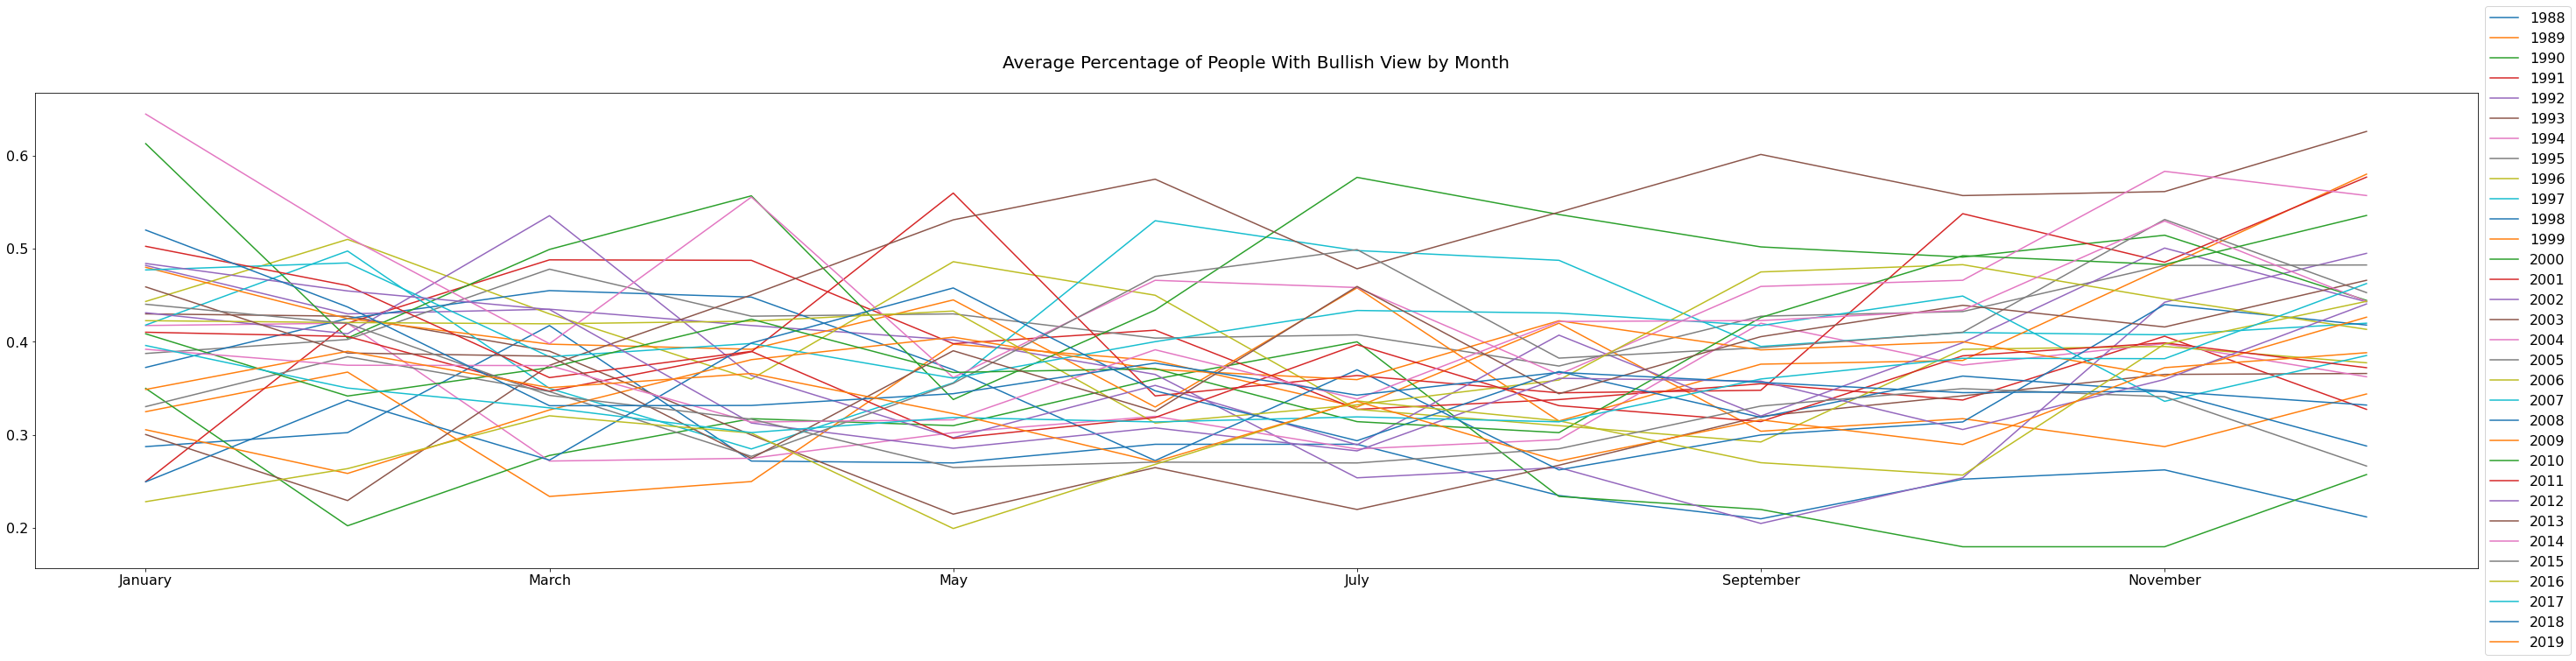

In [7]:
view = 'Bullish'

fulldata['Year'] = [date.year for date in fulldata['Date']]
fulldata['Month'] = [date.month for date in fulldata['Date']]
monthly_bullish_avg = fulldata[['Year', 'Month', view]].groupby(['Year', 'Month']).mean().unstack().dropna()
monthly_bullish_avg.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = monthly_bullish_avg.T.plot(figsize=(50,10))
ax.set_title('Average Percentage of People With %s View by Month\n'%view, fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

But then we take month to month diff of the average and things will become a bit more interesting. 

In [8]:
mon_to_mon_chg = fulldata[['Year', 'Month', view]].groupby(['Year', 'Month']).mean().diff().unstack().dropna()
mon_to_mon_chg.columns = monthly_bullish_avg.columns
mon_to_mon_chg

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1988,0.019500,0.015000,0.115000,-0.145500,-0.002000,0.020000,-5.551115e-17,-0.055000,-0.025000,0.042500,0.010000,-0.050500
1989,0.113000,0.042500,-0.133500,0.016000,0.147500,-0.017500,-5.000000e-02,0.090000,-0.116000,0.013500,-0.030000,0.056500
1990,0.006000,-0.147500,0.075500,0.039500,-0.007500,0.050000,4.000000e-02,-0.166000,-0.014000,-0.040000,0.000000,0.077500
1991,-0.007500,0.170000,0.068000,-0.000500,-0.089500,0.014500,-8.500000e-02,0.010500,0.017000,-0.017500,0.068500,-0.078500
1992,0.154500,-0.052000,0.005000,-0.017500,-0.015500,-0.037000,-1.110000e-01,0.011000,-0.060000,0.049000,0.188500,0.052500
1993,-0.065000,-0.002500,-0.037500,-0.090000,-0.085000,0.050000,-4.500000e-02,0.047500,0.052500,0.022000,0.023000,0.001000
1994,0.051500,0.002500,-0.148000,0.003000,0.027500,0.017500,-3.500000e-02,0.010000,0.125000,-0.045000,0.023000,-0.035500
1995,0.025000,0.015000,0.075500,-0.050500,0.002500,-0.026000,3.500000e-03,-0.033500,0.053500,0.005000,0.049500,0.000500
1996,-0.039167,0.066667,-0.080000,-0.070000,0.126000,-0.036000,-1.225000e-01,-0.017500,-0.017500,0.099500,0.003000,-0.017500


Below is a summary of the monthly average data. 

In [9]:
mon_to_mon_chg.describe()

,January,February,March,April,May,June,July,August,September,October,November,December
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,-0.008706,-0.014096,-0.013305,-0.011616,-0.005353,0.002431,-0.000526,-0.011704,0.010573,0.019101,0.031787,0.005175
std,0.080611,0.074017,0.082535,0.072644,0.089007,0.079718,0.069350,0.071522,0.061217,0.047629,0.066126,0.058249
min,-0.226610,-0.208700,-0.148000,-0.171525,-0.218700,-0.217775,-0.122500,-0.166000,-0.116000,-0.051938,-0.113030,-0.086271
25%,-0.041225,-0.052750,-0.077935,-0.061700,-0.059527,-0.036250,-0.050737,-0.057255,-0.026575,-0.010945,-0.008919,-0.039250
50%,-0.005302,-0.010847,-0.020579,-0.003000,0.000195,0.016000,-0.004314,-0.007901,0.001873,0.013750,0.011962,0.000750
75%,0.043250,0.036853,0.059551,0.030987,0.054523,0.050000,0.035106,0.031881,0.052750,0.035895,0.085802,0.053639
max,0.154500,0.170000,0.145175,0.157400,0.170350,0.174000,0.142500,0.117755,0.125000,0.189575,0.188500,0.100000


The standard deviation of the data seems to change more in the first half of a year, and to change less in the second half. The standard deviation reaches its minimum in October. Since we are looking at month to month changes, this means the percentage of people with a bullish view in September and the same percentage in October tend not to change as much as early months. 

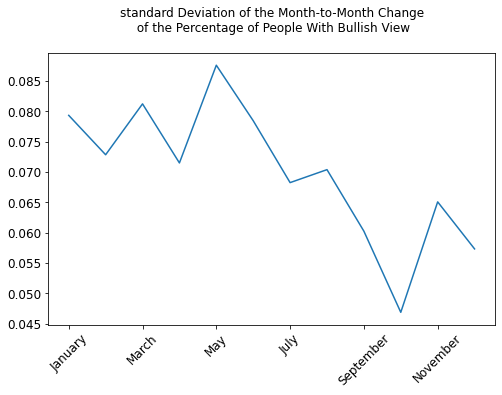

In [10]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
ax = mon_to_mon_chg.apply(np.std).plot(rot=45, figsize=(8, 5))
ax.set_title('standard Deviation of the Month-to-Month Change\n of the Percentage of People With %s View\n'%view)
plt.show()

Next we explore the pair plot. To determine the x limit and y limit we find the maximum and minimum of the monthly average data. 

In [11]:
mon_to_mon_chg.values.min(), mon_to_mon_chg.values.max()

(-0.2266100000000001, 0.18957500000000005)

The aforementioned volatility structure is also obvious in the pair plots. But aside from that there does not seem to have other interesting patterns. 

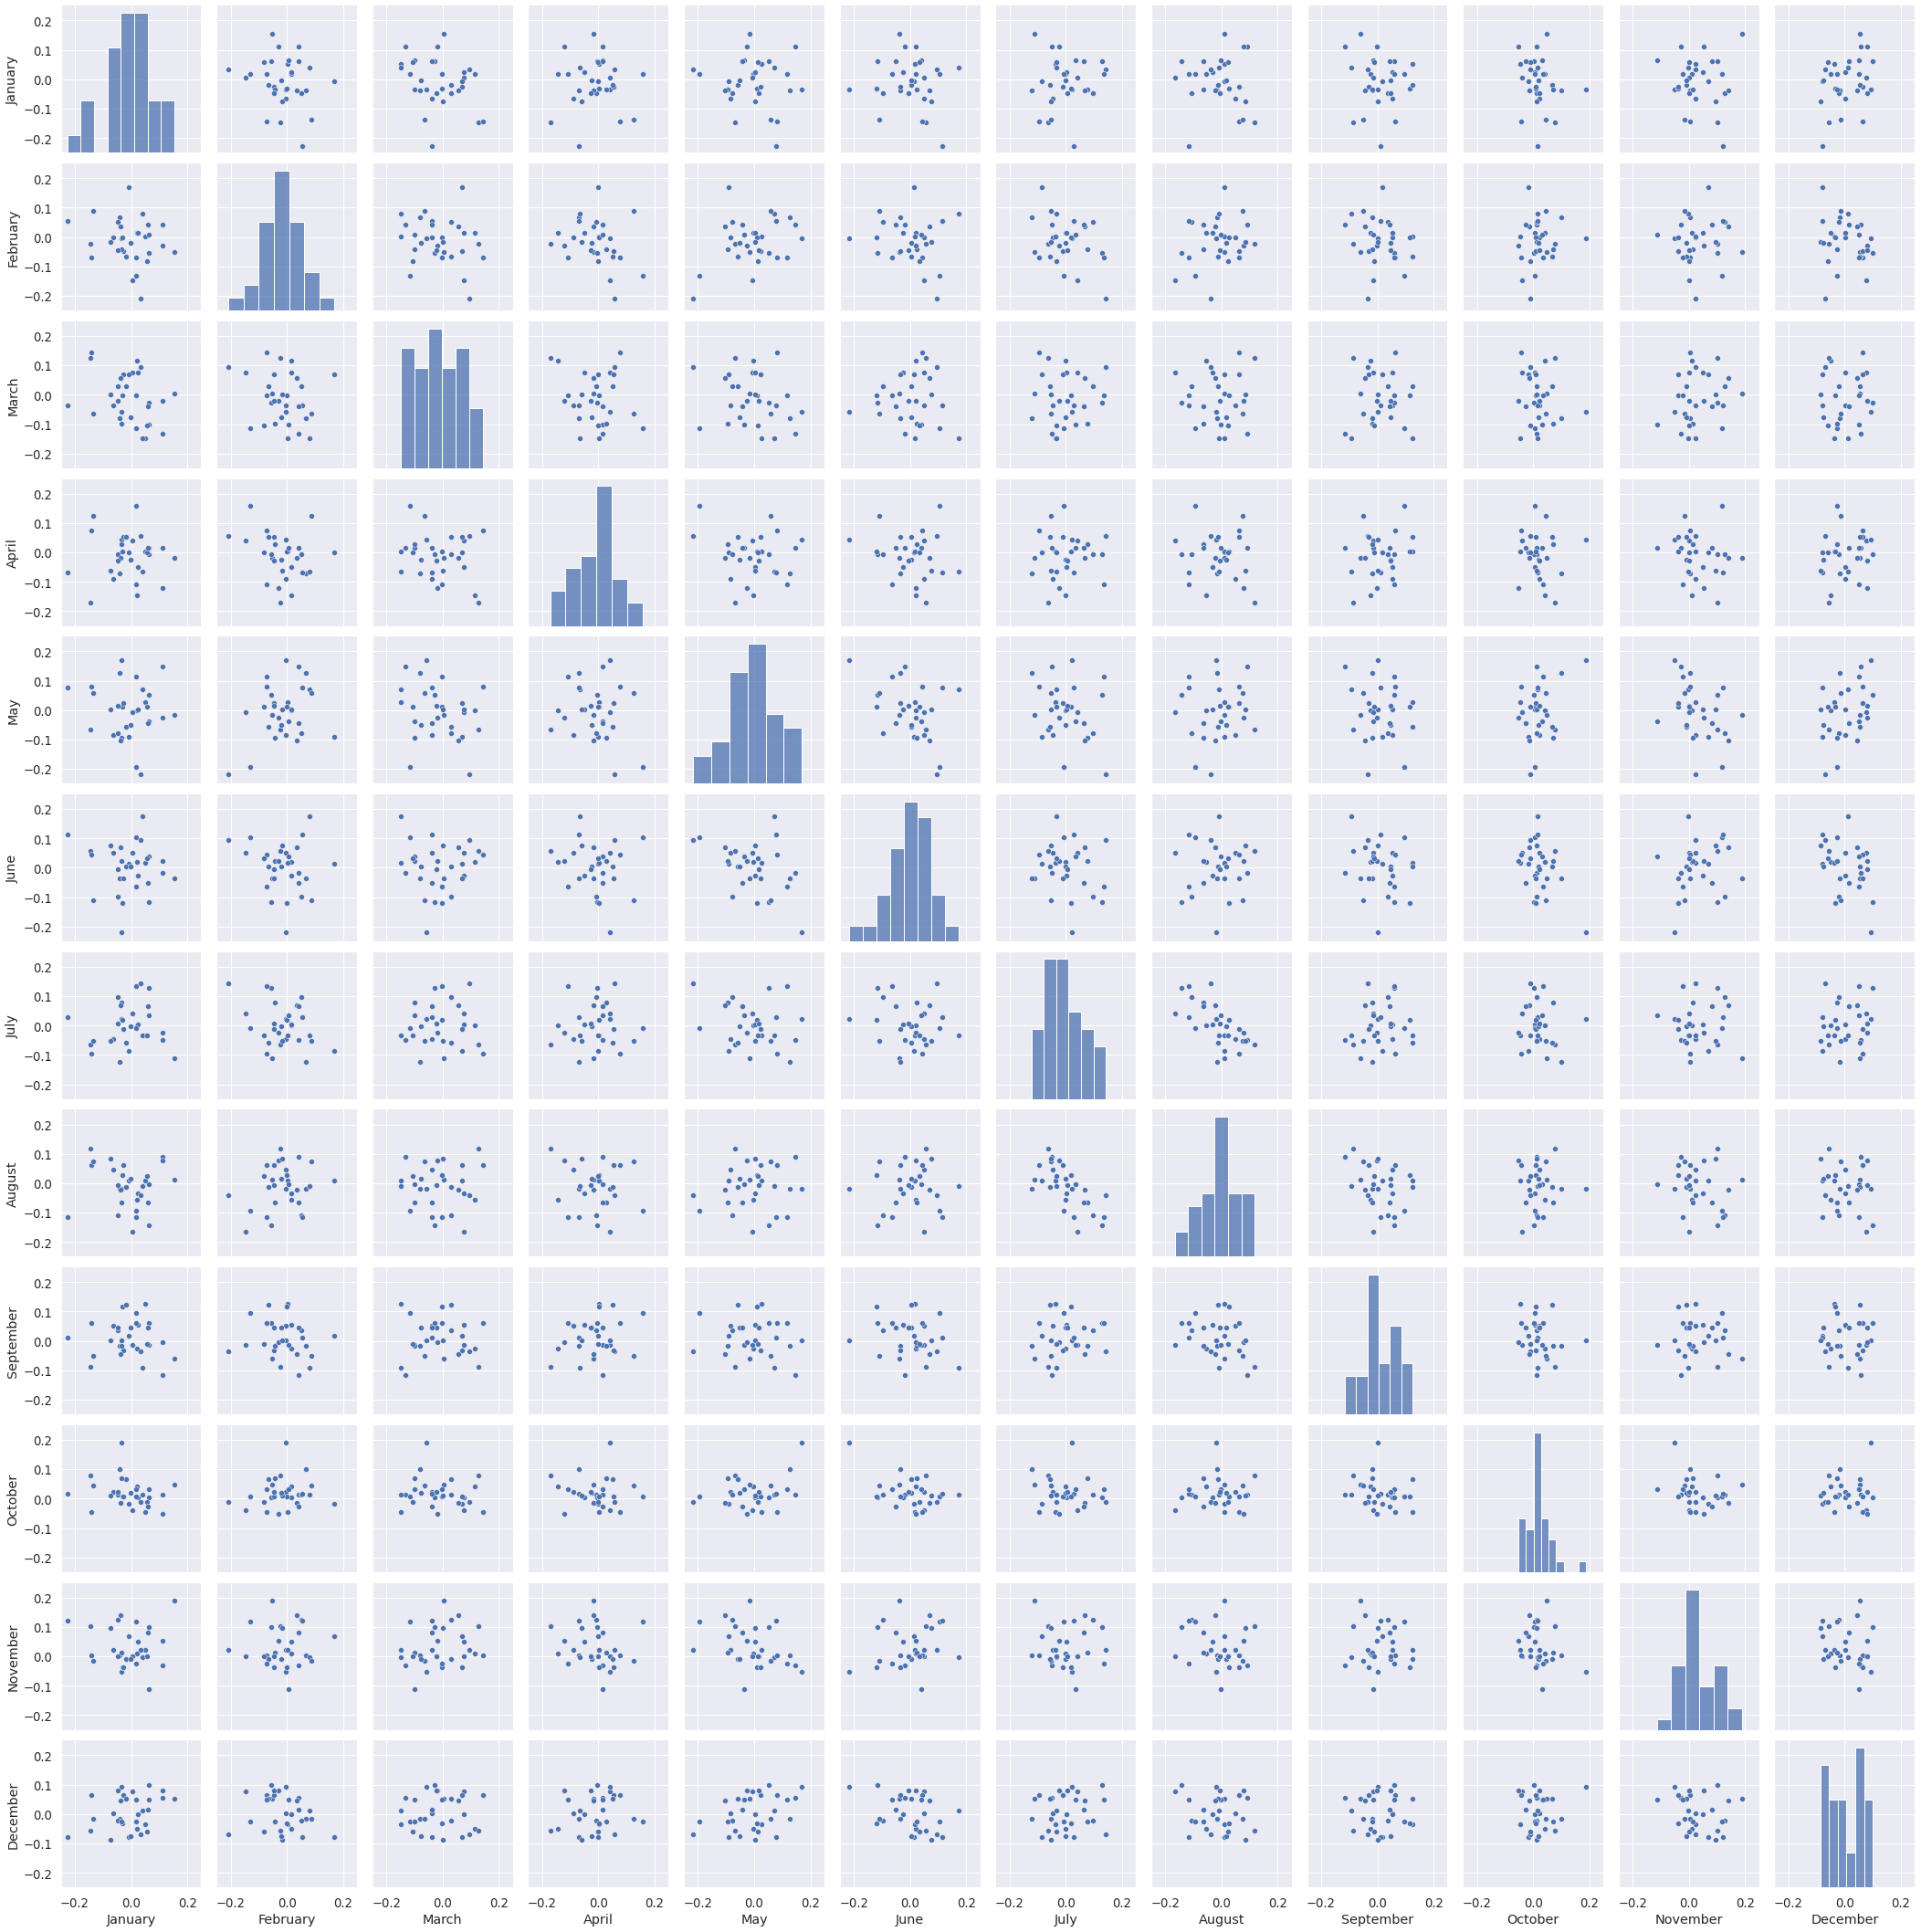

In [12]:
sns.set(font_scale=1.2)
g = sns.pairplot(mon_to_mon_chg)
for row in g.axes:
    for ax in row:
        ax.set_xlim((-0.25, 0.25))
        ax.set_ylim((-0.25, 0.25))

plt.show()

The conclusion so far, as mentioned previously, is that the percentage of people with a bullish view in September and the same percentage in October tend not to change as much as early months in a year, although that does not mean people tend not to change their view from September to October. For example, a survey conducted on 100 people in September could show 50 bullish and 50 bearish, but in October every one changes their veiw and as a result the percentage stays the same. It could still be the case that "people tend not to change their views in fall". Without more detailed data, it is just hard to further explore. 

If we do the same for Bearish view percentages, the result will be very similar. In the early months of a year, the percentage tends to change more while in the later months it changes less, with the September standard deviation being the smallest and the October one the second smallest. To see the results on the Bearish veiw, simply go back to the first code cell in this question, set ```view = 'Bearish'```, and rerun the notebook. 

**Question Five:** Do you think that investors are generally "correct" in their sentiments?
In other words, does their opinion regarding the future of the market
predict where the market will be over the following six months? Create a
plot that explores this. Be sure to include a description of your conclusion.
**Do not perform any "formal"
analyses.**

**Answer:**

First we construct a 26-Week Return column in the data, representing the return of the following 26 weeks (forward looking). Simple pair plots on the return and the Bullish and Bearish percentages show no evidence of any predictive power the survey results might have. 

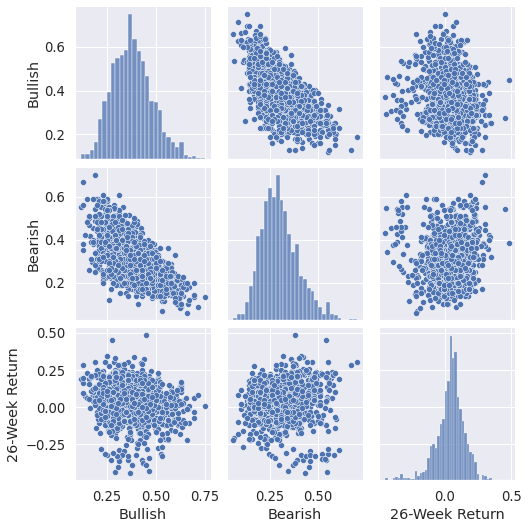

In [50]:
fulldata['Close in 26 Weeks'] = fulldata['S&P 500 Weekly Close'].shift(26)
fulldata['Previous Weekly Close'] = fulldata['S&P 500 Weekly Close'].shift(-1)
fulldata['26-Week Return'] = fulldata['Close in 26 Weeks']/fulldata['Previous Weekly Close'] - 1
sns.pairplot(fulldata[['Bullish', 'Bearish', '26-Week Return']].dropna())
plt.show()

Next we divide the data set by the 26-Week Return into 10 categories, 0 being the worst (negative) return and 9 being the best. In each group we take average of the Bullish, Neutral, and Bearish percentages. The result is presented in a stacked bar chart. The result shows that, in the beginning of a period of 6 months where the market has the best return (rank 9), the bearish percentage is actually the highest. In contrast, the rank 2 bin has the lowest bearish percentage. In fact, from rank 2 to rank 8 the bearish percentage is roughly increasing while the bullish percentage is decreasing. Intuitively, the result says the more bearish the investors are, the more you should buy (and hold 6 months). Rank 0, 1 and 9 do not follow this rule, likely because the return is so extreme there are not enough data points to make meaningful inferences (like the average). This observation could be used to fit a Gaussian mixture model to determine if one should buy and hold 6 month at any point in time. 

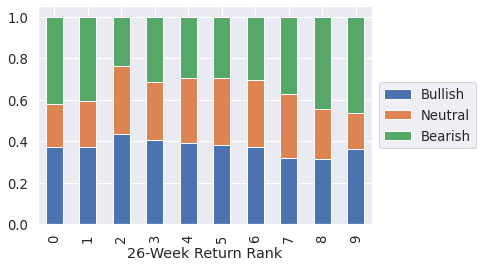

In [54]:
fulldata['26-Week Return Rank'] = pd.cut(fulldata['26-Week Return'], 10, labels=range(10))
fulldata[['26-Week Return Rank', 'Bullish', 'Neutral', 'Bearish']].dropna().groupby('26-Week Return Rank').mean().plot(kind='bar', stacked=True, )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Below we also present the number of days in each category, and the actual return range of each categories. 

In [55]:
fulldata[['26-Week Return Rank', 'Bullish']].dropna().groupby('26-Week Return Rank').count().rename(columns={'Bullish': 'Count'})

,Count
26-Week Return Rank,
0,11
1,20
2,31
3,143
4,363
5,740
6,309
7,73
8,10


In [58]:
pd.cut(fulldata['26-Week Return'], 10)

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
1726    (-0.259, -0.166]
1727    (-0.259, -0.166]
1728    (-0.259, -0.166]
1729                 NaN
1730                 NaN
Name: 26-Week Return, Length: 1731, dtype: category
Categories (10, interval[float64]): [(-0.445, -0.351] < (-0.351, -0.259] < (-0.259, -0.166] < (-0.166, -0.0736] ... (0.111, 0.204] < (0.204, 0.297] < (0.297, 0.389] < (0.389, 0.482]]